In [81]:
import cv2 ##pip install opencv-python
!pip install deepface
from deepface import DeepFace


In [82]:
img = cv2.imread('happy boy.jpg')


In [83]:
import matplotlib.pyplot as plt 

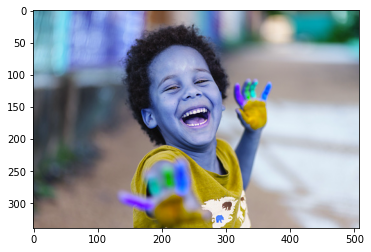

In [84]:
plt.imshow(img) ##BGR

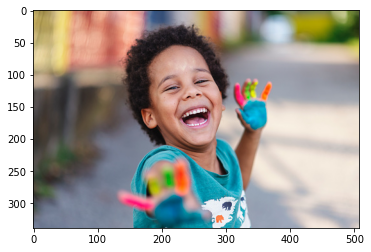

In [85]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [86]:
predictions = DeepFace.analyze(img)








Action: race: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.77it/s]


In [87]:
predictions


[{'emotion': {'angry': 4.8635816562130193e-14,
   'disgust': 0.0,
   'fear': 5.974510894557949e-13,
   'happy': 100.0,
   'sad': 1.7470559721122214e-09,
   'surprise': 1.133880383791426e-11,
   'neutral': 3.261590939679758e-16},
  'dominant_emotion': 'happy',
  'region': {'x': 170, 'y': 61, 'w': 137, 'h': 137},
  'age': 39,
  'gender': {'Woman': 95.67486047744751, 'Man': 4.325137659907341},
  'dominant_gender': 'Woman',
  'race': {'asian': 6.358211487531662,
   'indian': 5.170093849301338,
   'black': 28.528141975402832,
   'white': 8.435612916946411,
   'middle eastern': 4.246050864458084,
   'latino hispanic': 47.26188778877258},
  'dominant_race': 'latino hispanic'}]

In [88]:
type(predictions)


list

In [89]:


# Access the 'dominant_emotion' value from the first dictionary in the list
dominant_emotion = predictions[0]['dominant_emotion']

print(dominant_emotion)  # This should print 'neutral'



happy


In [90]:
for entry in predictions:
    dominant_emotion = entry['dominant_emotion']
    print(dominant_emotion)


happy


In [91]:
# we are trying to draw a rectangle across the face 

In [92]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [93]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   #print(faceCascade.empty())
faces = faceCascade.detectMultiScale(gray,1.1,4)
   # Draw a rectangle around the faces
for(x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h),(0,255,0),2)# basically 2 is the width of the line .
print(gray)

[[151 158 163 ...  97  96  96]
 [154 159 164 ...  97  95  94]
 [158 163 165 ...  95  93  91]
 ...
 [131 130 127 ... 214 215 214]
 [131 129 128 ... 215 216 216]
 [130 129 128 ... 215 216 216]]


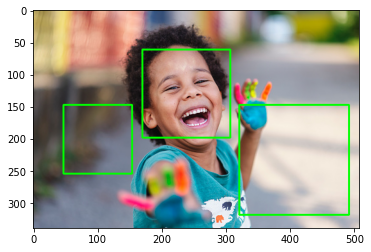

In [94]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))



In [95]:
font = cv2.FONT_HERSHEY_SIMPLEX

  # we will use putText() method for 
  # inserting text on video 
cv2.putText(img,
            predictions[0]['dominant_emotion'] , 
            (0,50), # 50,50 is the value we will reduce it to 0,50
            font,1,
            (0,0,255),
            2,
            cv2.LINE_4);

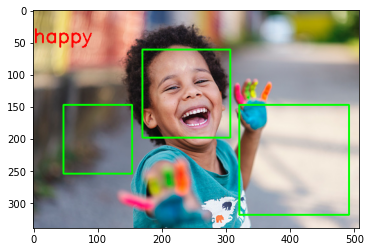

In [96]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [97]:
# Real time video demo for Face Emotion Recognition


In [100]:
import cv2 ### pip install opencv-python
!pip install deepface
from deepface import DeepFace ## pip install deepface

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
# check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read() ## read one image from a video 
    result = DeepFace.analyze(frame,actions = ['emotion'])
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    #Draw a rectangle around the faces 
    for(x,y,w,h) in faces: 
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255),2 )
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        # Use putText() method for 
        # inserting text on video 
        cv2.putText(frame, result['dominant_emotion'],(0,50),font ,1,(0,0,255),2,cv2.LINE_4)
        cv2.imshow('Demo video',frame)
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
        

Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.27it/s]


TypeError: list indices must be integers or slices, not str

In [104]:
import cv2
!pip install deepface
from deepface import DeepFace

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret, frame = cap.read()
    result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, result[0]
                    ['dominant_emotion'], (0, 50), font, 1, (0, 0, 255), 2, cv2.LINE_4)
        cv2.imshow('Demo video', frame)

        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.86it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.40it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.58it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.52it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.18it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.38it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.84it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.49it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.29it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.63it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.72it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.26it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.24it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.66it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.45it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.85it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.31it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.28it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.48it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.26it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.16it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.00it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.77it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.17it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.07it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.92it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.80it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.73it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.79it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.69it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.46it/s]


AttributeError: 'NoneType' object has no attribute 'startswith'

In [1]:
import cv2
import numpy as np
import os
from imutils import face_utils
from imutils.face_utils import FaceAligner
from keras.models import load_model
import create_mask, get_bounding_rect
from blend import blend
import dlib

CNN_MODEL = 'cnn_model_keras.h5'
SHAPE_PREDICTOR_68 = "shape_predictor_68_face_landmarks.dat"

cnn_model = load_model(CNN_MODEL)
shape_predictor_68 = dlib.shape_predictor(SHAPE_PREDICTOR_68)
detector = dlib.get_frontal_face_detector()

cam = cv2.VideoCapture(1)
if cam.read()[0] == False:
    cam = cv2.VideoCapture(0)
cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
cam.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
fa = FaceAligner(shape_predictor_68, desiredFaceWidth=250)

def get_emojis():
    emojis_folder = 'C:/Users/Public/Git/usr/share/perl5/core_perl/unicore/lib'
    emojis = []
    for emoji in range(len(os.listdir(emojis_folder))):
        print(emoji)
        emojis.append(cv2.imread(emojis_folder + str(emoji) + '.png', -1))
    return emojis

def get_image_size():
    img = cv2.imread('.jpg', 0)
    return img.shape

image_x, image_y = get_image_size()

def keras_process_image(img):
    img = cv2.resize(img, (image_x, image_y))
    img = np.array(img, dtype=np.float32)
    img = np.reshape(img, (1, image_x, image_y, 1))
    return img

def keras_predict(model, image):
    processed = keras_process_image(image)
    pred = model.predict(processed)
    pred_probab = pred[0]
    pred_class = list(pred_probab).index(max(pred_probab))
    return max(pred_probab), pred_class

def fun_util():
    emojis = get_emojis()
    disp_probab, disp_class = 0, 0
    while True:
        img = cam.read()[1]
        img = cv2.flip(img, 1)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)
        if len(faces) > 0:
            for i, face in enumerate(faces):
                shape_68 = shape_predictor_68(img, face)
                shape = face_utils.shape_to_np(shape_68)
                mask = create_mask(shape, img)
                mask_aligned = fa.align(mask, gray, face)
                face_aligned = fa.align(masked, gray, face)
                (x0, y0, x1, y1) = get_bounding_rect(mask_aligned)
                face_aligned = face_aligned[y0:y1, x0:x1]
                face_aligned = cv2.resize(face_aligned, (100, 100))
                (x, y, w, h) = face_utils.rect_to_bb(face)
                cv2.imshow('faceAligned', face_aligned)
                cv2.imshow('face #{}'.format(i), img[y:y+h, x:x+w])
                pred_probab, pred_class = keras_predict(cnn_model, face_aligned)
                img = blend(img, emojis[pred_class], (x, y, w, h))
        cv2.imshow('img', img)
        if cv2.waitKey(1) == ord('q'):
            break

keras_predict(cnn_model, np.zeros((100, 100, 1), dtype=np.uint8))
fun_util()




C:\Users\PC\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ModuleNotFoundError: No module named 'create_mask'

In [3]:
import cv2
import numpy as np
from deepface import DeepFace

# Load the Haarcascade classifier for face detection
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load emojis and map emotions to their respective emoji images
emojis = {
    "angry": cv2.imread('angry_emoji.png', -1),
    "sad": cv2.imread('sad_emoji.png', -1),
    "happy": cv2.imread('happy_emoji.png', -1),
    "neutral": cv2.imread('neutral_emoji.png', -1),
    "surprise": cv2.imread('surprise_emoji.png', -1),
    "fear": cv2.imread('fear_emoji.png', -1),
    "disgust": cv2.imread('disgust_emoji.png', -1),
}

# Capture video from webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        face_roi = frame[y:y+h, x:x+w]
        result = DeepFace.analyze(face_roi, actions=['emotion'])
        dominant_emotion = result[0]['dominant_emotion']
        
        # Overlay emoji on the detected face region
        if dominant_emotion in emojis:
            emoji = emojis[dominant_emotion]
            emoji_resized = cv2.resize(emoji, (w, h))
            overlay = np.zeros_like(frame)
            overlay[y:y+h, x:x+w, :] = emoji_resized
            
            # Apply transparency if emoji has an alpha channel
            if emoji.shape[2] == 4:
                alpha = emoji[:, :, 3] / 255.0
                overlay[y:y+h, x:x+w, :3] = overlay[y:y+h, x:x+w, :3] * (1 - alpha) + emoji[:, :, :3] * alpha
            
            frame = cv2.addWeighted(frame, 1, overlay, 0.7, 0)

    cv2.imshow('Emotion Detection with Emojis', frame)

    if cv2.waitKey(1) == 27:  # Press 'Esc' key to exit
        break

cap.release()
cv2.destroyAllWindows()


ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.